In [4]:
#Preparing Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [5]:
#Accessing the Data
Path = 'Assignment1_StreamFlow_Subscription_Data.csv'
Subscrip = pd.read_csv(Path)

#First Glance At the Data
Subscrip.head()


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [6]:
#Gathering more Info about Columns & Data Types
Subscrip.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [16]:
#Converting Subscription Start Date to the correct Data Type of "DateTime"
Subscrip['Subscription_Start_Date'] = pd.to_datetime(Subscrip['Subscription_Start_Date'])
 
#Converting Date_of_Churn to the correct Data type of "Datetime"
Subscrip['Date_of_Churn'] = pd.to_datetime(Subscrip['Date_of_Churn'])

#Converting Churned to the correct Data Type of "Binary"
Subscrip['Churned'] = Subscrip['Churned'].astype(bool)

#Checking the Data types again to ensure all of them are in the right format now
print(Subscrip.dtypes)

User_ID                             int64
Age                                 int64
Gender                             object
Location                           object
Subscription_Start_Date    datetime64[ns]
Subscription_Type                  object
Monthly_Payment                   float64
Payment_Method                     object
Monthly_Hours_Watched             float64
Favorite_Genre                     object
Devices_Used                       object
Average_Session_Length            float64
Content_ID                          int64
Rating_Given                        int64
Churned                              bool
Date_of_Churn              datetime64[ns]
Reason_for_Churn                   object
dtype: object


In [7]:
#Generating Summary Statistics to understand the dispersion of data
Subscrip.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [8]:
#Checking for Missing Values
missing_values = Subscrip.isnull()

#Quantifying Missing Values
missing_values_Sum = Subscrip.isnull().sum()
print(missing_values_Sum)

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [30]:
#Finding the Percentage of Missing Values for Each Coloumn 
percentage_of_data_missing_per_coloumn = (missing_values_Sum / len(Subscrip)) * 100
print(percentage_of_data_missing_per_coloumn)

User_ID                     0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Subscription_Start_Date     0.0
Subscription_Type           0.0
Monthly_Payment             0.0
Payment_Method              0.0
Monthly_Hours_Watched       0.0
Favorite_Genre              0.0
Devices_Used                0.0
Average_Session_Length      0.0
Content_ID                  0.0
Rating_Given                0.0
Churned                     0.0
Date_of_Churn              75.4
Reason_for_Churn           75.4
dtype: float64


In [ ]:
#Dropping the column "User ID" as its not useful in this particular case
Subscrip.drop(columns=['User_ID'], inplace=True)

In [ ]:
#Dropping the column "User ID" as its not useful in this particular case
Subscrip.drop(columns=['Content_ID'], inplace=True)

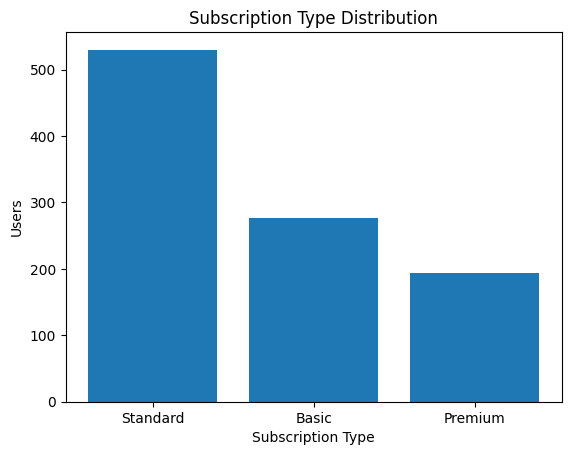

In [36]:
#Looking at the Subscription Type Distribution
Subscription_Types_By_Users = Subscrip['Subscription_Type'].value_counts()

#Creating a Bar Plot to Visualize the Data
plt.bar(Subscription_Types_By_Users.index, Subscription_Types_By_Users.values)
plt.title('Subscription Type Distribution')
plt.xlabel('Subscription Type')
plt.ylabel('Users')
plt.show()


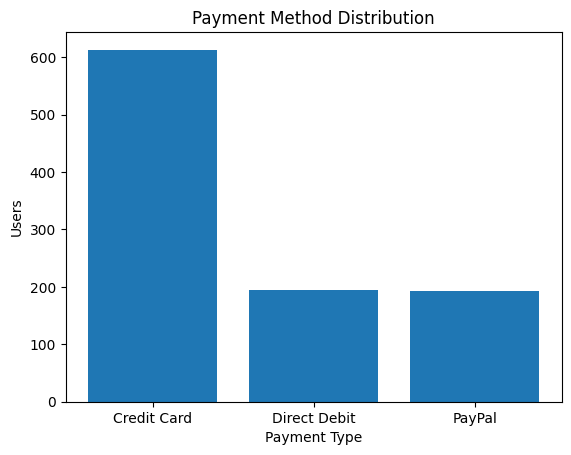

In [50]:
#Looking at the Payment Method Distribution 
Payment_Types_By_Users = Subscrip['Payment_Method'].value_counts()

#Creating a Bar Plot to Visualize the Data
plt.bar(Payment_Types_By_Users.index, Payment_Types_By_Users.values)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Users')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

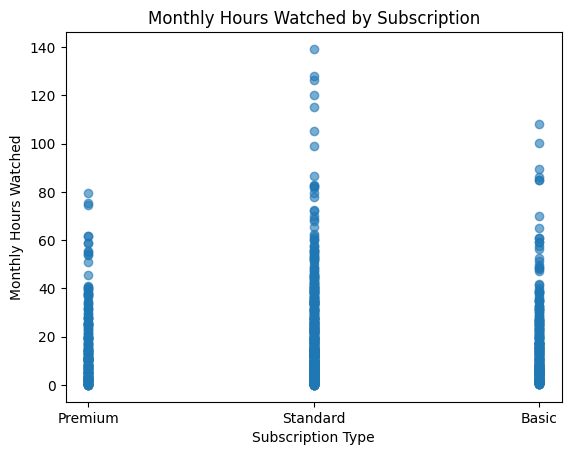

In [48]:
#Looking at the Subscription Type and Monthly Hours Watched
plt.scatter(Subscrip['Subscription_Type'], Subscrip['Monthly_Hours_Watched'], alpha=0.6)


#Creating a Scatterplot to Visualize the Data
plt.title('Monthly Hours Watched by Subscription')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Hours Watched')
plt.show

C:\Users\syedc\AppData\Local\Temp\ipykernel_14968\233015874.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Groups = Subscrip.groupby(['Age_Groups', 'Favorite_Genre']).size().unstack(fill_value=0)


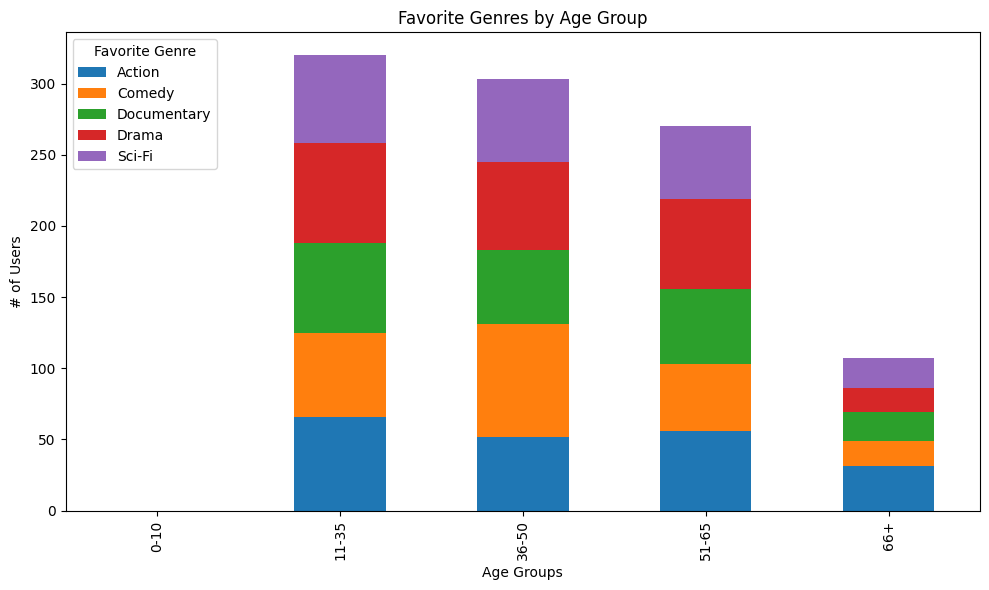

In [65]:
#Creating Age Groups to understand the Favourite Genre among users
Age_Groups = ['0-10', '11-35', '36-50', '51-65', '66+']
Age_Bins = [0, 10, 35, 50, 65, 100]
Subscrip['Age_Groups'] = pd.cut(Subscrip['Age'], bins=Age_Bins, labels=Age_Groups, ordered=False)

#Creating a Stacked Bar Chart to visualize the data
Groups = Subscrip.groupby(['Age_Groups', 'Favorite_Genre']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
Groups.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Age Groups')
ax.set_ylabel('# of Users')
ax.set_title('Favorite Genres by Age Group')
ax.legend(title='Favorite Genre', loc='upper left')

plt.tight_layout()
plt.show()





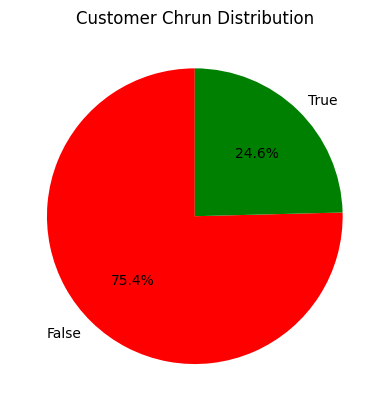

In [66]:
#Looking into the Churned Data to Identify any patterns
Churned_Users = Subscrip['Churned'].value_counts()

#Creating a Pie Chart to visualize the user distribution
fig, ax = plt.subplots()
ax.pie(Churned_Users, labels=Churned_Users.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
ax.set_title('Customer Chrun Distribution')
plt.show()


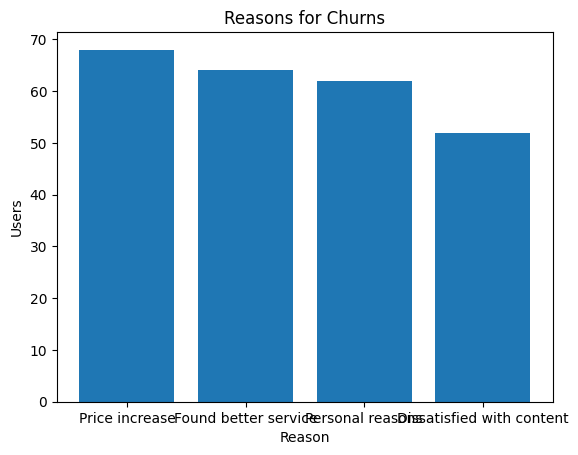

In [67]:
#Looking at the Rasons for Churns
Reasons_for_Churns = Subscrip['Reason_for_Churn'].value_counts()

#Creating a Bar Plot to Visualize the Data
plt.bar(Reasons_for_Churns.index, Reasons_for_Churns.values)
plt.title('Reasons for Churns')
plt.xlabel('Reason')
plt.ylabel('Users')
plt.show()

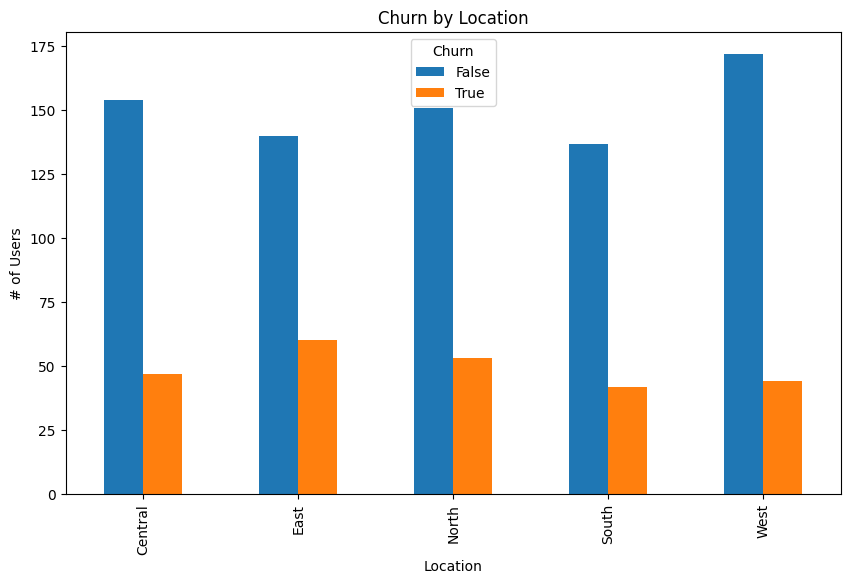

In [68]:
#Looking at the most common location that Churns
Location_group = Subscrip.groupby(['Location', 'Churned']).size().unstack(fill_value=0)

#Creating a Bar Plot to Visualize the Data
Location_group.plot(kind='bar', stacked=False,figsize=(10, 6))
plt.title('Churn by Location')
plt.xlabel('Location')
plt.ylabel('# of Users')
plt.legend(title='Churn')
plt.show()



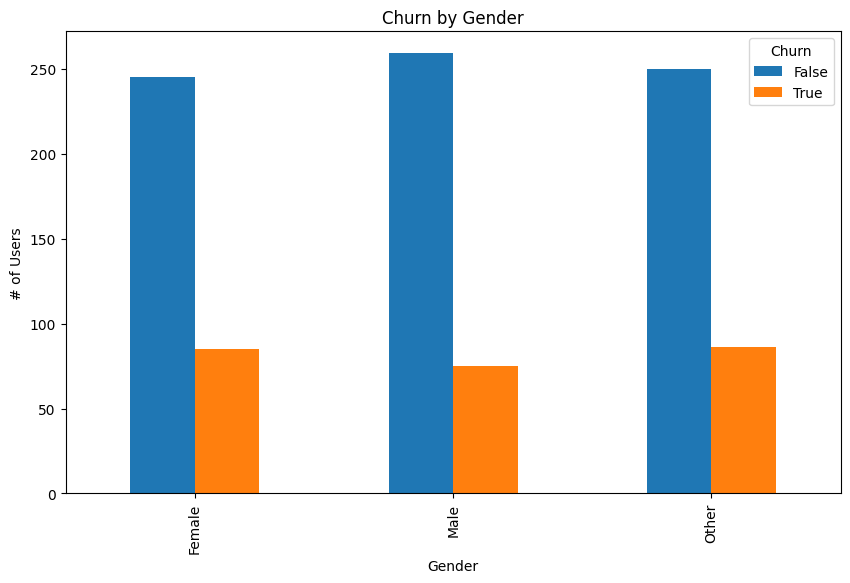

In [70]:
#Deteccting any pattern in Gender that Churns
Gender_group = Subscrip.groupby(['Gender', 'Churned']).size().unstack(fill_value=0)

#Creating a Bar Plot to Visualize the Data
Gender_group.plot(kind='bar', stacked=False,figsize=(10, 6))
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('# of Users')
plt.legend(title='Churn')
plt.show()

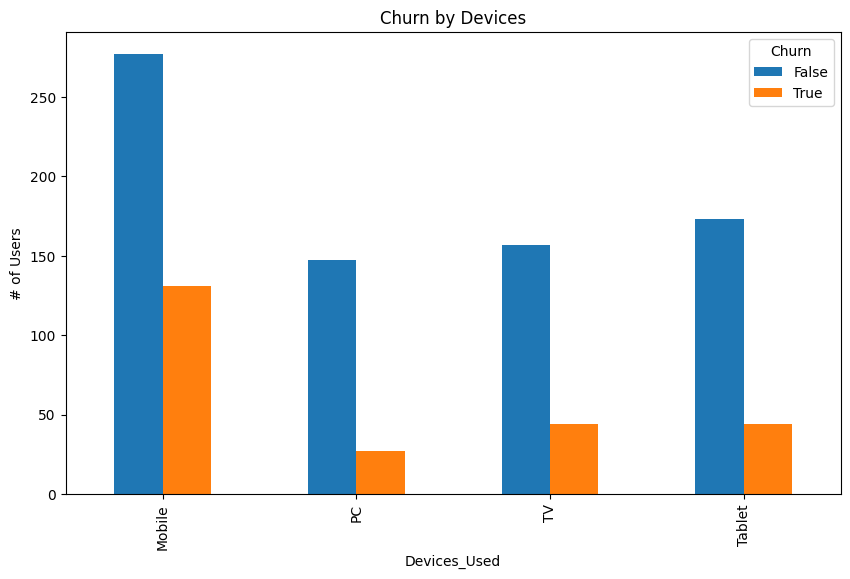

In [71]:
#Deteccting any pattern in Device Type that Churns
Devices_Used_group = Subscrip.groupby(['Devices_Used', 'Churned']).size().unstack(fill_value=0)

#Creating a Bar Plot to Visualize the Data
Devices_Used_group.plot(kind='bar', stacked=False,figsize=(10, 6))
plt.title('Churn by Devices')
plt.xlabel('Devices_Used')
plt.ylabel('# of Users')
plt.legend(title='Churn')
plt.show()

<Figure size 1000x600 with 0 Axes>

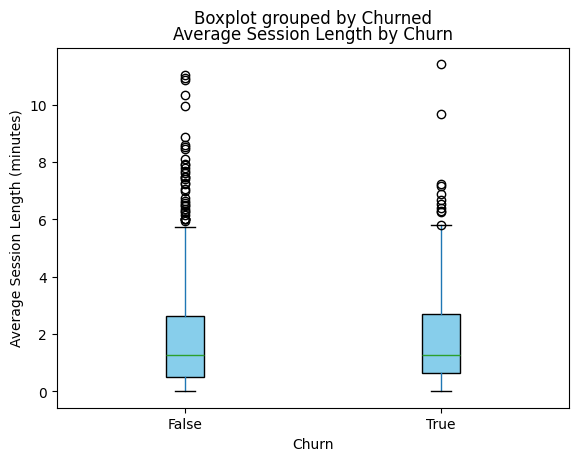

In [74]:
#Deteccting any pattern in Users' Session Length that Churns
plt.figure(figsize=(10, 6))
Subscrip.boxplot(column='Average_Session_Length', by='Churned', grid=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Average Session Length by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Session Length (minutes)')

# Show the plot
plt.show()


                             Age  Monthly_Payment  Monthly_Hours_Watched  \
Age                     1.000000         0.010608              -0.004570   
Monthly_Payment         0.010608         1.000000              -0.000528   
Monthly_Hours_Watched  -0.004570        -0.000528               1.000000   
Average_Session_Length -0.037128         0.011052              -0.011953   
Rating_Given           -0.033234        -0.004692              -0.003332   
Churned                -0.045139        -0.013059              -0.060233   

                        Average_Session_Length  Rating_Given   Churned  
Age                                  -0.037128     -0.033234 -0.045139  
Monthly_Payment                       0.011052     -0.004692 -0.013059  
Monthly_Hours_Watched                -0.011953     -0.003332 -0.060233  
Average_Session_Length                1.000000     -0.004209  0.008055  
Rating_Given                         -0.004209      1.000000 -0.175378  
Churned                      

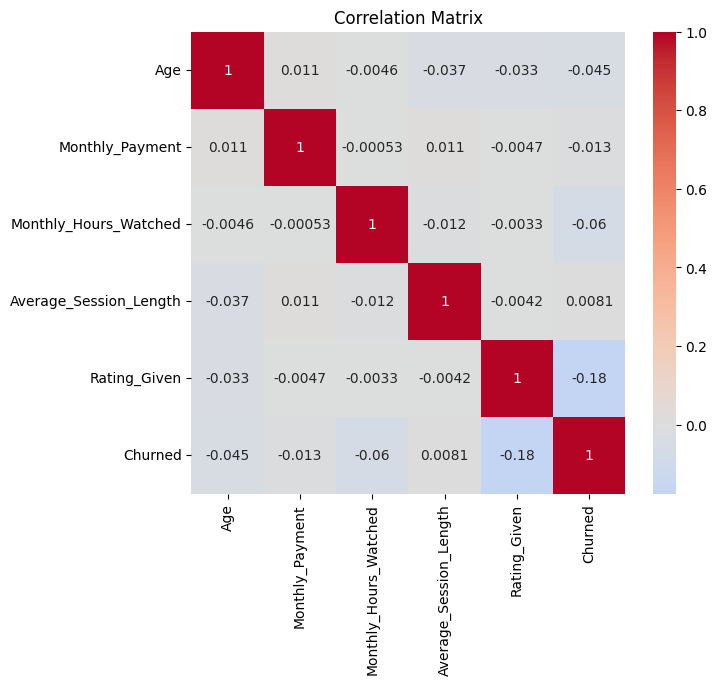

In [91]:
#Converting Churned to integer to create a Heatmap for all the numerical variables
Subscrip['Churned'] = Subscrip['Churned'].astype(int)
numeric_cols = Subscrip.select_dtypes(include=['number'])

corr = numeric_cols.corr()
print(corr)

plt.figure(figsize=(7, 6))
sns.heatmap(corr,annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [95]:
#Since Heatmap didn't produce any clear results, conducting further analyses Age vs. Churned
Average_Age_Churned = Subscrip[Subscrip['Churned'] ==1]['Age'].mean()
Average_Age_Non_Churned = Subscrip[Subscrip['Churned'] == 0]['Age'].mean()

print(f'Average Age of Churned Users: {Average_Age_Churned}')
print(f'Average Age of Non-Churned Users: {Average_Age_Non_Churned}')

Average Age of Churned Users: 43.17479674796748
Average Age of Non-Churned Users: 44.779840848806366


In [96]:
#Since Heatmap didn't produce any clear results, conducting further analyses Monthly Payments vs. Churned
Average_of_Monthly_Payment_that_Churned = Subscrip[Subscrip['Churned'] ==1]['Monthly_Payment'].mean()
Average_of_Monthly_Payment_that_havent_Churned = Subscrip[Subscrip['Churned'] == 0]['Monthly_Payment'].mean()

print(f'Average of Monthly Payments that Churned: {Average_of_Monthly_Payment_that_Churned}')
print(f'Average of Monthly Payments that havent Churned: {Average_of_Monthly_Payment_that_havent_Churned}')

Average of Monthly Payments that Churned: 14.502195121951221
Average of Monthly Payments that havent Churned: 14.605384615384613


In [97]:
#Since Heatmap didn't produce any clear results, conducting further analyses Monthly Hours Watched vs. Churned
Average_of_Monthly_Hours_Watched_that_Churned = Subscrip[Subscrip['Churned'] ==1]['Monthly_Hours_Watched'].mean()
Average_of_Monthly_Hours_Watched_that_havent_Churned = Subscrip[Subscrip['Churned'] == 0]['Monthly_Hours_Watched'].mean()

print(f'Average of Monthly Hours Watched that Churned: {Average_of_Monthly_Hours_Watched_that_Churned}')
print(f'Average of Monthly Hours Watched that havent Churned: {Average_of_Monthly_Hours_Watched_that_havent_Churned}')

Average of Monthly Hours Watched that Churned: 17.03967201860143
Average of Monthly Hours Watched that havent Churned: 19.734607278346715


In [ ]:
#Since Heatmap didn't produce any clear results, conducting further analyses Average Session Length vs. Churned
Average_of_Session_Length_that_Churned = Subscrip[Subscrip['Churned'] ==1]['Average_Session_Length'].mean()
Average_of_Session_Length_that_havent_Churned = Subscrip[Subscrip['Churned'] == 0]['Average_Session_Length'].mean()

print(f'Average of User Session Length that Churned: {Average_of_Session_Length_that_Churned}')
print(f'Average of User Session Length that havent Churned: {Average_of_Session_Length_that_havent_Churne}')